In [1]:
#generate some linear looking data to test Normal equation
from matplotlib import pyplot as plt
import numpy as np
import random #we have to import random function
X = 2*np.random.rand(100,1) # creates an array of specified shape and fills it with random values.
y = 4+3*X+ np.random.rand(100,1) #the equation is y=4+ 3X1 + Gaussian noise
plt.plot(X,y)
plt.xlabel('X1')
plt.ylabel('y')
plt.legend()


No handles with labels found to put in legend.


In [2]:
#let's compute theta using normal equation,use inv() function using np.linalg to compute the inverse of a matrix
X_b = np.c_[np.ones((100,1)),X] #add x0=1 to each instance, np.ones(row,col),here .c means concatenation of these two matrics, X_b is the pseudoinverse of X
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T.dot(y)) #here "." declares the power
#the actual equation is y=4+ 3X1 + Gaussian noise, normal eqn is 0=inv((X*pow(T)*X))*(X*pow(T))*y
theta_best #here we find the value We would have hoped for θ0 = 4 and θ1 = 3 instead of θ0 = 4.215 and θ1 = 2.770. Close enough, but the noise made it impossible to recover the exact parameters of the original function.
#normal equation decribes the value of x,y

array([[4.44526944],
       [3.05057494]])

In [3]:
X_new = np.array([[0], [2]]) #here stroes a matrix which is two rows and one column,and the values is '0' and '2'
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance where the matrix is two rows and one column,'c' means concatenation
y_predict = X_new_b.dot(theta_best)  # here dot multiplication of preivous output value and one value matrix
y_predict

array([[ 4.44526944],
       [10.54641932]])

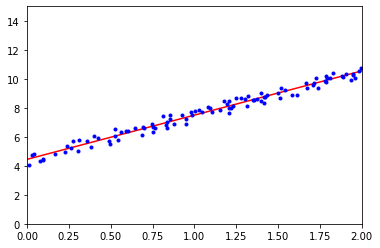

In [4]:
#let's plot this model predictions 
plt.plot(X_new,y_predict,"r-") #the predicted values shows in red line,X_new means just a 2*1 matrix and y_predict means the new output value
plt.plot(X,y,"b.") #here plot X,y values in blue, x means create a random values,and y is the equation
plt.axis([0,2,0,15]) #x axis- 0 to 2 and y axis - 0 to 15
plt.show()

In [5]:
#prevous codes shows performing linear regression without using scikit learn,and now shows performing linear regression using scikt learn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_ #this intercept and coef defines the values


(array([4.44526944]), array([[3.05057494]]))

In [6]:
lin_reg.predict(X_new) #X_new defines a 2*1 matrix,which stores 0 and 2,

array([[ 4.44526944],
       [10.54641932]])

In [7]:
#another process to find values of linear regression is scipy.linalg.lstsq():
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd #huge error

array([[4.44526944],
       [3.05057494]])

In [8]:
#another process to find the variable of linear regression,where 0=X^+y,where X^+ is the psedoinverse of X
np.linalg.pinv(X_b).dot(y) #X_b is the pseudo invese of X(means x^+ multiplication with y)


array([[4.44526944],
       [3.05057494]])

In [9]:
#gradient descent step,after each iteration the value of 0(cost function) is minimum
eta = 0.1 #learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) #random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
theta

array([[4.44526944],
       [3.05057494]])

In [10]:
#here implements stochastic gradient descent using a simple learning schedule
n_epochs = 50 #the code goes through the training set only 50 times
t0, t1 = 5,50   #learning schedule hyperparameters
def learning_schedule(t):
    return t0/(t+t1)
theta = np.random.randn(2,1) #random initialization
for epoch in range(n_epochs): #here take the dataset randomly but don't shuffle the training dataset
    for i in range(m): #here previously m=100
        random_index = np.random.randint(m) #take a random number of m data
        xi = X_b[random_index:random_index+1] #X_b is the pseudoinverse of X and here colon means the range
        yi = y[random_index:random_index+1] #y stores the value from random_index to random_index+1
        gradients = 2* xi.T.dot(xi.dot(theta) -yi) #here dot means multiplication
        # The function that determines the learning rate at each iteration is called the learning schedule
        eta = learning_schedule(epoch * m +i)  #eta defines the perfect learning rate of each iteration, 
        theta = theta -eta * gradients
theta


array([[4.43000048],
       [3.07484187]])

In [11]:
#another process: applying SGD by using sckit learn
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000,tol=1e-3,penalty=None,eta0=0.1)
sgd_reg.fit(X,y.ravel()) #numpy.ravel() returns contigous flattended array,X means the random value and y means the equation
sgd_reg.intercept_,sgd_reg.coef_

(array([4.38962908]), array([3.0599078]))

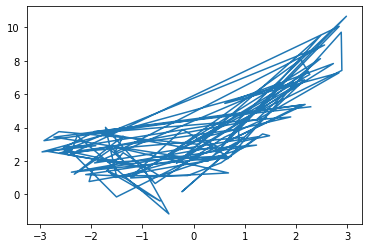

In [12]:
#generate a non linear data based on quadratic equation
m= 100
X= 6*np.random.rand(m,1)-3 #take random value from 1 to 100 and subtract by 3 and stores on X(an array)
y = 0.5 * X**2 + X +2 + np.random.randn(m,1)  # by using X,here generates a equation, "np.random(m,1)" returns a constant value
plt.plot(X,y)

In [13]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,include_bias=False) #here the feature is 2nd degree polynomial
X_poly = poly_features.fit_transform(X) #where X is the random value and y is the equation
#fit_transform means to do some calculation and then do transformation (say calculating the means of columns from some data and then replacing the missing values). So for training set, you need to both calculate and do transformation
X[0]      #here the first index's value of random value
X_poly[0] #the co ordinate X_poly now contains the original feature of X plus the square of this feature.
#X_poly now contains the original feature of X plus the square of this feature

array([2.29016541, 5.24485762])

In [14]:
#Now you can fit a LinearRegression model to this extended training data
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y) #X_poly now contains the original feature of X plus the square of this feature and fit this with y(the equation)

lin_reg.intercept_,lin_reg.coef_ #it shows the value of x and the value of coordinates

(array([2.0547378]), array([[1.00665557, 0.49829107]]))

In [15]:
#learning curve: these are plots of the models performance on the training set and validation set as a function of the training set size
#this is the linear regression model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2) #Split arrays or matrices into random train and test subsets.
    train_errors, val_errors = [], [] #initailly train errors and  value errors are empty
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m]) #here [:m] means an array which contains 1 to mth element
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict)) #add these on train errors and val errors
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

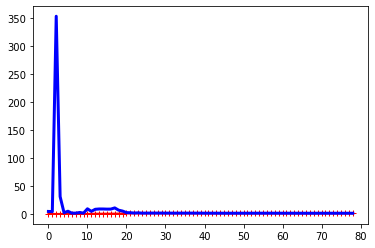

In [16]:
#let's look at the learning curves of a 10th degree polynomial model
#this is the polynomial regression model(10th degree)
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([ #here a dictionary defines two features
("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression, X, y)  #here passing the parameters to prvious function

In [17]:
#perform ridge regression with scikit learn using a closed form solution(using matrix factorization technique by andrei lous cholesky)
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]]) 

array([[5.01442216]])

In [18]:
#using SGDRegressor instead of Ridge regressor, so the penalty is "l2"
sgd_reg = SGDRegressor(penalty="l2") #here penalty is l2
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])



array([4.98960992])

In [19]:
#small scikt learn example using the lasso class
from sklearn.linear_model import Lasso
lasso_reg= Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.96459416])

In [20]:
#short example using scikit learn's ElasticNet
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1,l1_ratio=0.5) #l1_ration means the mix ratio r
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.96647379])

In [21]:
#basic implementation of early stopping
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
#prepare the data
poly_scaler = Pipeline([
    ("poly_features",PolynomialFeatures(degree=90,include_bias=False)),
    ("std_scaler",StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train) #by using fit_transform the training and testing dataset fit and scaled
X_val_poly_scaler = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1,tol=np.infty,warm_start=True,penalty=None,learning_rate="constant",eta0=0.0005)
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled,y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error=mean_squared_error(y_val,y_val_predict) #here the MSE of real value of y and predicted value of y
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clode(sgd_reg)
        



NameError: name 'X_train' is not defined

In [22]:
from sklearn.base import clone
# prepare the data
poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
penalty=None, learning_rate="constant", eta0=0.0005)
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

NameError: name 'X_train' is not defined

Text(0, 0.5, 'RMSE')

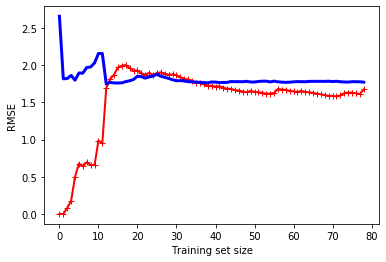

In [23]:
#linear
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y) #sending parameter linear regression
plt.xlabel("Training set size")
plt.ylabel("RMSE")

Text(0, 0.5, 'RMSE')

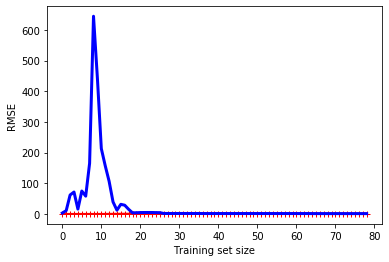

In [24]:
#polynomial
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ("poly_fetures",PolynomialFeatures(degree=10,include_bias=False)),
    ("lin_reg",LinearRegression())
])
plot_learning_curves(polynomial_regression,X,y)
plt.xlabel("Training set size")
plt.ylabel("RMSE")

G:\Anaconda installation\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


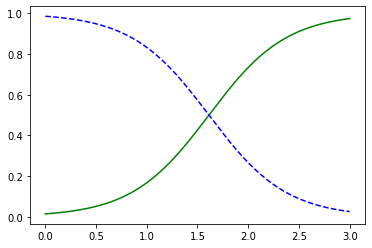

In [28]:
from sklearn import datasets
iris = datasets.load_iris() #import the dataset
list(iris.keys())
X = iris["data"][:,3:] #petal width, the data whcih one's width is 3
y = (iris["target"]==2).astype(np.int) #1 if iris virginina,else 0,the target or label of iris virginica is 2
#now lets train logistic regression model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y) #fit the value of data and target of virginica
#let's look at the model's estimated probabilites for flowers with petal widths varying from 0 to 3 cm
X_new = np.linspace(0,3,1000).reshape(-1,1) #numpy, linspace: numpy.linspace(start,stop,num=50). -num : int, optional Number of samples to generate. Default is 50. Must be non-negative.
y_proba = log_reg.predict_proba(X_new) #predict_proba: Compute probabilities of possible outcomes for samples 
plt.plot(X_new,y_proba[:,1],"g-",label="Iris-Virginica") #whcih value is 1
plt.plot(X_new,y_proba[:,0],"b--",label="Not Iris-Virginica") #which's value is 0

In [29]:
log_reg.predict([[1.7],[1.5]]) #predict shows the predcition, in figure 1.7 shows that the flower is iris virginica and 1.5 shows that the flower is not iris virginica

array([1, 0])

In [30]:
#using softmax regression which describes the perfect output from multiple classes
X = iris["data"][:, (2,3)]
y = iris["target"]
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs",C=10) #here applying softmax regression by using logictic regression where the multi_class is multinomial and solver is lbfgs
softmax_reg.fit(X,y)
softmax_reg.predict([[5,2]]) #asking a iris which length is 5cm and width is 2cm,so the ans iris verginica which is 2nd index of this array
#predict method is given a train new model and predict the label of a new set of data
#pedict proba: Compute probabilities of possible outcomes for samples in X


array([2])

In [32]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])